# リポジトリクローン

In [1]:
!git clone https://github.com/lyuwenyu/RT-DETR
%cd RT-DETR
%cd rtdetrv2_pytorch

Cloning into 'RT-DETR'...
remote: Enumerating objects: 962, done.
remote: Counting objects: 100% (444/444), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 962 (delta 312), reused 230 (delta 226), pack-reused 518 (from 1)
Receiving objects: 100% (962/962), 591.41 KiB | 6.03 MiB/s, done.
Resolving deltas: 100% (470/470), done.
/content/RT-DETR
/content/RT-DETR/rtdetrv2_pytorch


In [2]:
!mkdir checkpoints

# パッケージインストール

In [3]:
!pip install -q onnx onnxruntime onnxsim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.4 MB/s eta 0:00:00


# 重みダウンロード

In [4]:
!wget -q https://github.com/lyuwenyu/storage/releases/download/v0.2/rtdetrv2_r18vd_120e_coco_rerun_48.1.pth -P checkpoints
# !wget -q https://github.com/lyuwenyu/RT-DETR/blob/main/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml -P checkpoints

!wget -q https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetrv2_r34vd_120e_coco_ema.pth -P checkpoints
# !wget -q https://github.com/lyuwenyu/RT-DETR/blob/main/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r34vd_120e_coco.yml -P checkpoints

!wget -q https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetrv2_r50vd_m_7x_coco_ema.pth -P checkpoints
# !wget -q https://github.com/lyuwenyu/RT-DETR/blob/main/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r50vd_m_7x_coco.yml -P checkpoints

!wget -q https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetrv2_r50vd_6x_coco_ema.pth -P checkpoints
# !wget -q https://github.com/lyuwenyu/RT-DETR/blob/main/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r50vd_6x_coco.yml -P checkpoints

!wget -q https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetrv2_r101vd_6x_coco_from_paddle.pth -P checkpoints
# !wget -q https://github.com/lyuwenyu/RT-DETR/blob/main/rtdetrv2_pytorch/configs/rtdetrv2/rtdetrv2_r101vd_6x_coco.yml -P checkpoints

# ONNX出力

In [5]:
!python tools/export_onnx.py \
    -c configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml \
    -r checkpoints/rtdetrv2_r18vd_120e_coco_rerun_48.1.pth \
    --output_file rtdetrv2_r18vd_120e_coco_rerun_48.onnx \
    --check

2024-10-12 01:18:20.026434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-12 01:18:20.138314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-12 01:18:20.158201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-12 01:18:20.252625: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-12 01:18:21.739704: W tensorflow/compiler/tf2

In [6]:
!onnxsim rtdetrv2_r18vd_120e_coco_rerun_48.onnx rtdetrv2_r18vd_120e_coco_rerun_48.onnx

Your model contains "Tile" ops or/and "ConstantOfShape" ops. Folding these ops can make the 
simplified model much larger. If it is not expected, please specify "--no-large-tensor" (which will 
lose some optimization chances)
Simplifying...
Finish! Here is the difference:
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃                 ┃ Original Model ┃ Simplified Model ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Add             │ 126            │ 117              │
│ AveragePool     │ 3              │ 3                │
│ Cast            │ 11             │ 1                │
│ Clip            │ 9              │ 9                │
│ Concat          │ 75             │ 32               │
│ Constant        │ 684            │ 294              │
│ ConstantOfShape │ 4              │ 0                │
│ Conv            │ 57             │ 57               │
│ Div             │ 21             │ 17               │
│ Erf             │ 1              │ 1                │

# 推論テスト

In [7]:
!wget -q https://user0514.cdnw.net/shared/img/thumb/sup805120501_0284_D_TP_V4.jpg -O test.jpg

In [8]:
import onnxruntime

# モデル読み込み
onnx_session = onnxruntime.InferenceSession(
    'rtdetrv2_r18vd_120e_coco_rerun_48.onnx',
    providers=[
        'CPUExecutionProvider',
    ],
)
input_size = onnx_session.get_inputs()[0].shape
input_width, input_height = input_size[3], input_size[2]

print(onnx_session.get_providers())
print('input size:',input_size)

['CPUExecutionProvider']
input size: ['N', 3, 640, 640]


In [9]:
import cv2
import numpy as np

# 画像読み込み
image = cv2.imread('test.jpg')
image_height, image_width, _ = image.shape
original_size = np.array([[image_width, image_height]], dtype=np.int64)

# 前処理：BGR->RGB、リサイズ、正規化、NCHW
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(input_image, (input_width, input_height))
input_image = input_image.astype(np.float32) / 255.0
input_image = np.transpose(input_image, (2, 0, 1))
input_image = np.expand_dims(input_image, axis=0)

In [10]:
%%time

# 推論
output = onnx_session.run(
    None,
    input_feed={'images': input_image, "orig_target_sizes": original_size}
)

labels, bboxes, scores = output

CPU times: user 1.06 s, sys: 36 ms, total: 1.1 s
Wall time: 1.1 s


# 結果確認

In [11]:
import copy

# 描画
debug_image = copy.deepcopy(image)
score_threshold = 0.6

for label, bbox, score in zip(labels[0], bboxes[0], scores[0]):
    if score < score_threshold:
        continue

    cv2.rectangle(
        debug_image,
        (int(bbox[0]), int(bbox[1])),
        (int(bbox[2]), int(bbox[3])),
        (0, 255, 0),
        2,
    )
    cv2.putText(
        debug_image,
        str(label),
        (int(bbox[0]), int(bbox[1]-8)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        2,
    )

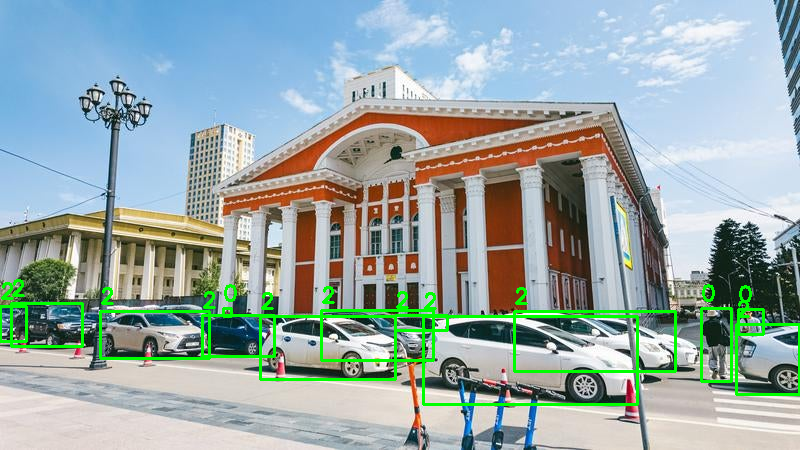

In [12]:
from google.colab.patches import cv2_imshow

cv2_imshow(debug_image)